# Data Analysis (Python)

## 1. import python packages

In [14]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 2.Establish connection to database

In [15]:
import pyodbc
import urllib
import sqlalchemy

# '''sources databases'''
# params_p = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
#                                  "SERVER=localhost\SQLEXPRESS;"
#                                  "DATABASE=DataWarehouse1;"
#                                  "UID=sa;"
#                                  "PWD=user1")

# engine_p = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_p))


# params_s = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
#                                  "SERVER=localhost\SQLEXPRESS;"
#                                  "DATABASE=DataWarehouse2;"
#                                  "UID=sa;"
#                                  "PWD=user1")

# engine_s = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_s))



'''destination databases'''

params_datahub = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                 "SERVER=localhost\SQLEXPRESS;"
                                 "DATABASE=datahub;"
                                 "UID=sa;"
                                 "PWD=user1")

engine_datahub = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_datahub))

## 3.read data from datahub

In [18]:
df_sales_p=pd.read_sql_table('sales_data_primary',engine_datahub)
df_sales_s=pd.read_sql_table('sales_data_secondary',engine_datahub)

## 4. check data

In [19]:
df_sales_p

,onboarded_month,user_login_month,count_user_login,auth_month,registration_status,primary_act_holder_member_id,transfer_amount,deposit_amount,deposit_count,transaction_amount,transfer_count
0,2021-08-25,2021-05-28,61,2021-12-04,pending,115,1850.46,1998.67,97,71.95,43
1,2021-07-27,2021-07-06,7,2021-06-23,onboarded,914,893.41,1476.74,57,66.15,72
2,2021-08-13,2021-04-15,85,2021-11-11,pending,148,828.36,1841.52,95,19.99,56
3,2021-11-09,2021-08-10,21,2021-11-29,onboarded,715,546.21,1681.80,91,15.89,65
4,2021-06-10,2021-10-15,37,2021-08-28,activated,967,1431.53,1949.70,82,82.57,12
...,...,...,...,...,...,...,...,...,...,...,...
9995,2021-10-18,2021-04-08,83,2021-08-28,activated,33,735.81,1532.73,22,58.23,99
9996,2021-01-13,2021-01-09,29,2021-01-27,activated,714,865.76,305.50,21,52.17,16
9997,2021-07-12,2021-02-24,27,2021-04-08,onboarded,613,934.46,1702.59,91,18.88,91
9998,2021-12-18,2021-05-29,87,2021-05-25,pending,868,1451.52,1729.59,13,1.13,33


## 5. Data Processing(data aggregation, merging etc.)

In [20]:
df_p_g=df_sales_p.groupby('primary_act_holder_member_id').agg({
                                                    'registration_status':['min'],
#                                                     'onboarded_month':['min'],
                                                    'user_login_month':['min','max','count'],
                                                    'count_user_login':['sum','count','mean'],
     
                                                    'auth_month':['min','max','count'],
                                                    'transaction_amount':['sum','count','mean'],
                                                    'deposit_count':['sum','count','mean'],
                                                    
                                                    'deposit_amount':['sum','count','mean'],
                                                     'transfer_count':['sum','count','mean'],
                                                    'transfer_amount':['sum','count','mean']})
df_p_g.columns = ["_".join(col_name).rstrip('_') for col_name in df_p_g.columns.to_flat_index()]
df_p_g

,registration_status_min,user_login_month_min,user_login_month_max,user_login_month_count,count_user_login_sum,count_user_login_count,count_user_login_mean,auth_month_min,auth_month_max,auth_month_count,transaction_amount_sum,transaction_amount_count,transaction_amount_mean,deposit_count_sum,deposit_count_count,deposit_count_mean,deposit_amount_sum,deposit_amount_count,deposit_amount_mean,transfer_count_sum,transfer_count_count,transfer_count_mean,transfer_amount_sum,transfer_amount_count,transfer_amount_mean
primary_act_holder_member_id,,,,,,,,,,,,,,,,,,,,,,,,,
1,activated,2021-05-26,2021-12-20,10,743,10,74.300000,2021-02-05,2021-11-16,10,405.04,10,40.504000,509,10,50.900000,11758.34,10,1175.834000,417,10,41.700000,8418.20,10,841.820000
2,onboarded,2021-03-26,2021-11-12,8,473,8,59.125000,2021-03-29,2021-12-26,8,448.78,8,56.097500,480,8,60.000000,6231.80,8,778.975000,451,8,56.375000,7020.89,8,877.611250
3,activated,2021-01-25,2021-11-27,14,449,14,32.071429,2021-01-07,2021-12-27,14,667.10,14,47.650000,498,14,35.571429,16075.74,14,1148.267143,635,14,45.357143,13112.84,14,936.631429
4,activated,2021-03-29,2021-12-02,5,279,5,55.800000,2021-03-09,2021-06-30,5,210.59,5,42.118000,252,5,50.400000,5110.77,5,1022.154000,147,5,29.400000,7985.15,5,1597.030000
5,activated,2021-01-03,2021-12-23,8,371,8,46.375000,2021-05-13,2021-12-09,8,432.81,8,54.101250,259,8,32.375000,8085.58,8,1010.697500,456,8,57.000000,7270.16,8,908.770000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,activated,2021-01-16,2021-12-02,14,633,14,45.214286,2021-01-27,2021-12-05,14,667.34,14,47.667143,660,14,47.142857,11525.38,14,823.241429,557,14,39.785714,16415.77,14,1172.555000
996,activated,2021-01-06,2021-12-08,7,378,7,54.000000,2021-01-15,2021-12-28,7,338.09,7,48.298571,254,7,36.285714,8707.70,7,1243.957143,413,7,59.000000,5847.76,7,835.394286
997,activated,2021-02-01,2021-11-17,10,460,10,46.000000,2021-01-03,2021-11-05,10,422.37,10,42.237000,626,10,62.600000,12081.80,10,1208.180000,644,10,64.400000,10376.84,10,1037.684000


In [21]:
df_c_g=df_sales_s.groupby('primary_act_holder_member_id').agg({'registration_status':['min'],
#                                                      'member_id':['count'],
#                                                      'onboarded_month':['min'],
                                                    'user_login_month':['min','max','count'],
                                                    'count_user_login':['sum','count','mean'],
                                                    'auth_month':['min','max','count'],
                                                    'transaction_amount':['sum','count','mean'],
                                                    'receive_count':['sum','count','mean'],                                                   
                                                    'receive_amount':['sum','count','mean'],
                                                     'purchase_count':['sum','count','mean'],
                                                    'purchase_amount':['sum','count','mean']})
df_c_g.columns = ["_".join(col_name).rstrip('_') for col_name in df_c_g.columns.to_flat_index()]
df_c_g

,registration_status_min,user_login_month_min,user_login_month_max,user_login_month_count,count_user_login_sum,count_user_login_count,count_user_login_mean,auth_month_min,auth_month_max,auth_month_count,transaction_amount_sum,transaction_amount_count,transaction_amount_mean,receive_count_sum,receive_count_count,receive_count_mean,receive_amount_sum,receive_amount_count,receive_amount_mean,purchase_count_sum,purchase_count_count,purchase_count_mean,purchase_amount_sum,purchase_amount_count,purchase_amount_mean
primary_act_holder_member_id,,,,,,,,,,,,,,,,,,,,,,,,,
1,activated,2021-01-01,2021-01-01,5,379,5,75.800000,2021-01-01,2021-01-01,4,255.15,5,51.030000,203,5,40.600000,5306.44,5,1061.288000,415,5,83.000000,6300.56,5,1260.112000
2,activated,2021-01-01,2021-01-01,2,67,2,33.500000,2021-01-01,2021-01-01,2,79.95,2,39.975000,121,2,60.500000,869.29,2,434.645000,110,2,55.000000,2737.92,2,1368.960000
3,activated,2021-01-01,2021-01-01,3,132,3,44.000000,2021-01-01,2021-01-01,3,141.58,3,47.193333,104,3,34.666667,2505.21,3,835.070000,131,3,43.666667,4284.56,3,1428.186667
4,activated,2021-01-01,2021-01-01,1,4,1,4.000000,2021-01-01,2021-01-01,1,97.87,1,97.870000,75,1,75.000000,1664.40,1,1664.400000,60,1,60.000000,1086.80,1,1086.800000
5,activated,2021-01-01,2021-01-01,3,129,3,43.000000,2021-01-01,2021-01-01,3,212.28,3,70.760000,155,3,51.666667,4163.04,3,1387.680000,163,3,54.333333,3848.13,3,1282.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,activated,2021-01-01,2021-01-01,5,230,5,46.000000,2021-01-01,2021-01-01,4,140.05,5,28.010000,208,5,41.600000,5485.52,5,1097.104000,203,5,40.600000,6408.97,5,1281.794000
996,activated,2021-01-01,2021-01-01,7,388,7,55.428571,2021-01-01,2021-01-01,5,397.46,7,56.780000,412,7,58.857143,9015.13,7,1287.875714,446,7,63.714286,6171.99,7,881.712857
997,activated,2021-01-01,2021-01-01,5,322,5,64.400000,2021-01-01,2021-01-01,1,201.67,5,40.334000,283,5,56.600000,5817.58,5,1163.516000,252,5,50.400000,6477.43,5,1295.486000


In [22]:
df_all=pd.merge(df_p_g,df_c_g,on='primary_act_holder_member_id',how='left',suffixes=['_primary','_secondary']).reset_index()
df_all.head()

,primary_act_holder_member_id,registration_status_min_primary,user_login_month_min_primary,user_login_month_max_primary,user_login_month_count_primary,count_user_login_sum_primary,count_user_login_count_primary,count_user_login_mean_primary,auth_month_min_primary,auth_month_max_primary,auth_month_count_primary,transaction_amount_sum_primary,transaction_amount_count_primary,transaction_amount_mean_primary,deposit_count_sum,deposit_count_count,deposit_count_mean,deposit_amount_sum,deposit_amount_count,deposit_amount_mean,transfer_count_sum,transfer_count_count,transfer_count_mean,transfer_amount_sum,transfer_amount_count,transfer_amount_mean,registration_status_min_secondary,user_login_month_min_secondary,user_login_month_max_secondary,user_login_month_count_secondary,count_user_login_sum_secondary,count_user_login_count_secondary,count_user_login_mean_secondary,auth_month_min_secondary,auth_month_max_secondary,auth_month_count_secondary,transaction_amount_sum_secondary,transaction_amount_count_secondary,transaction_amount_mean_secondary,receive_count_sum,receive_count_count,receive_count_mean,receive_amount_sum,receive_amount_count,receive_amount_mean,purchase_count_sum,purchase_count_count,purchase_count_mean,purchase_amount_sum,purchase_amount_count,purchase_amount_mean
0,1,activated,2021-05-26,2021-12-20,10,743,10,74.300000,2021-02-05,2021-11-16,10,405.04,10,40.50400,509,10,50.900000,11758.34,10,1175.834000,417,10,41.700000,8418.20,10,841.820000,activated,2021-01-01,2021-01-01,5.0,379.0,5.0,75.8,2021-01-01,2021-01-01,4.0,255.15,5.0,51.030000,203.0,5.0,40.600000,5306.44,5.0,1061.288,415.0,5.0,83.000000,6300.56,5.0,1260.112000
1,2,onboarded,2021-03-26,2021-11-12,8,473,8,59.125000,2021-03-29,2021-12-26,8,448.78,8,56.09750,480,8,60.000000,6231.80,8,778.975000,451,8,56.375000,7020.89,8,877.611250,activated,2021-01-01,2021-01-01,2.0,67.0,2.0,33.5,2021-01-01,2021-01-01,2.0,79.95,2.0,39.975000,121.0,2.0,60.500000,869.29,2.0,434.645,110.0,2.0,55.000000,2737.92,2.0,1368.960000
2,3,activated,2021-01-25,2021-11-27,14,449,14,32.071429,2021-01-07,2021-12-27,14,667.10,14,47.65000,498,14,35.571429,16075.74,14,1148.267143,635,14,45.357143,13112.84,14,936.631429,activated,2021-01-01,2021-01-01,3.0,132.0,3.0,44.0,2021-01-01,2021-01-01,3.0,141.58,3.0,47.193333,104.0,3.0,34.666667,2505.21,3.0,835.070,131.0,3.0,43.666667,4284.56,3.0,1428.186667
3,4,activated,2021-03-29,2021-12-02,5,279,5,55.800000,2021-03-09,2021-06-30,5,210.59,5,42.11800,252,5,50.400000,5110.77,5,1022.154000,147,5,29.400000,7985.15,5,1597.030000,activated,2021-01-01,2021-01-01,1.0,4.0,1.0,4.0,2021-01-01,2021-01-01,1.0,97.87,1.0,97.870000,75.0,1.0,75.000000,1664.40,1.0,1664.400,60.0,1.0,60.000000,1086.80,1.0,1086.800000
4,5,activated,2021-01-03,2021-12-23,8,371,8,46.375000,2021-05-13,2021-12-09,8,432.81,8,54.10125,259,8,32.375000,8085.58,8,1010.697500,456,8,57.000000,7270.16,8,908.770000,activated,2021-01-01,2021-01-01,3.0,129.0,3.0,43.0,2021-01-01,2021-01-01,3.0,212.28,3.0,70.760000,155.0,3.0,51.666667,4163.04,3.0,1387.680,163.0,3.0,54.333333,3848.13,3.0,1282.710000


## 6. EDA(Explotary Data Analysis) including data visulization

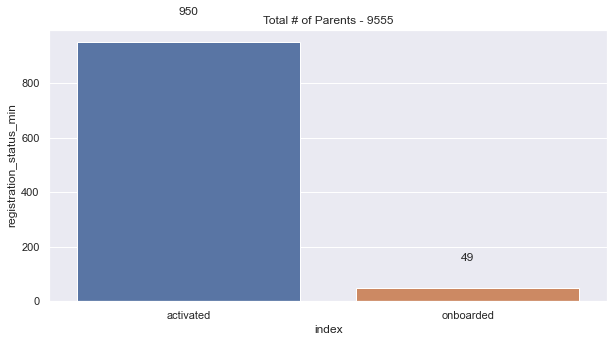

In [23]:
import seaborn as sns
# plot vertical barplot
sns.set(rc={'figure.figsize':(10,5)})
df=pd.DataFrame(df_p_g['registration_status_min'].value_counts()).reset_index()
ax = sns.barplot(x='index',y='registration_status_min',data=df)
ax.set(title='Total # of Parents - 9555') # title barplot
# label each bar in barplot
for p in ax.patches:
     # get the height of each bar
     height = p.get_height()
     # adding text to each bar
     ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
     y = height+100, # y-coordinate position of data label, padded 100 above bar
     s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
     ha = 'center') # sets horizontal alignment (ha) to center

## 7. segmentation

In [31]:
'''Monetary value'''
df_all['Monetary value']=pd.qcut(df_all.query('auth_month_min_primary.notnull()',engine='python')['transfer_amount_sum'],5,labels=[5,4,3,2,1],duplicates='drop').astype(int)
df_all['Monetary value_range']=pd.qcut(df_all.query('auth_month_min_primary.notnull()',engine='python')['transfer_amount_sum'],5,duplicates='drop')

'''Recency'''
df_all['Recency']=pd.cut(df_all.query('auth_month_min_primary.notnull()',engine='python')['auth_month_max_primary'],5,labels=[5,4,3,2,1],duplicates='drop').astype(int)
df_all['Recency_range']=pd.cut(df_all.query('auth_month_min_primary.notnull()',engine='python')['auth_month_max_primary'],5,duplicates='drop')

'''Frequency'''
df_all['Frequency']=pd.qcut(df_all.query('auth_month_min_primary.notnull()',engine='python')['transfer_count_sum'],5,labels=[5,4,3,2,1],duplicates='drop').astype(int)
df_all['Frequency_range']=pd.qcut(df_all.query('auth_month_min_primary.notnull()',engine='python')['transfer_count_sum'],5,duplicates='drop')

'''some data processing'''
df_all['Monetary value_range']=df_all['Monetary value_range'].astype(str)
df_all['Recency_range']=df_all['Recency_range'].astype(str)
df_all['Frequency_range']=df_all['Frequency_range'].astype(str)

## 8.export the results to datahub

###    a.check result

In [32]:
df_all


,primary_act_holder_member_id,registration_status_min_primary,user_login_month_min_primary,user_login_month_max_primary,user_login_month_count_primary,count_user_login_sum_primary,count_user_login_count_primary,count_user_login_mean_primary,auth_month_min_primary,auth_month_max_primary,auth_month_count_primary,transaction_amount_sum_primary,transaction_amount_count_primary,transaction_amount_mean_primary,deposit_count_sum,deposit_count_count,deposit_count_mean,deposit_amount_sum,deposit_amount_count,deposit_amount_mean,transfer_count_sum,transfer_count_count,transfer_count_mean,transfer_amount_sum,transfer_amount_count,transfer_amount_mean,registration_status_min_secondary,user_login_month_min_secondary,user_login_month_max_secondary,user_login_month_count_secondary,count_user_login_sum_secondary,count_user_login_count_secondary,count_user_login_mean_secondary,auth_month_min_secondary,auth_month_max_secondary,auth_month_count_secondary,transaction_amount_sum_secondary,transaction_amount_count_secondary,transaction_amount_mean_secondary,receive_count_sum,receive_count_count,receive_count_mean,receive_amount_sum,receive_amount_count,receive_amount_mean,purchase_count_sum,purchase_count_count,purchase_count_mean,purchase_amount_sum,purchase_amount_count,purchase_amount_mean,Monetary value,Monetary value_range,Recency,Recency_range,Frequency,Frequency_range
0,1,activated,2021-05-26,2021-12-20,10,743,10,74.300000,2021-02-05,2021-11-16,10,405.04,10,40.504000,509,10,50.900000,11758.34,10,1175.834000,417,10,41.700000,8418.20,10,841.820000,activated,2021-01-01,2021-01-01,5.0,379.0,5.0,75.800000,2021-01-01,2021-01-01,4.0,255.15,5.0,51.030000,203.0,5.0,40.600000,5306.44,5.0,1061.288000,415.0,5.0,83.000000,6300.56,5.0,1260.112000,4,"(6939.948, 8932.16]",1,"(2021-11-02 09:36:00, 2021-12-30]",4,"(345.0, 447.2]"
1,2,onboarded,2021-03-26,2021-11-12,8,473,8,59.125000,2021-03-29,2021-12-26,8,448.78,8,56.097500,480,8,60.000000,6231.80,8,778.975000,451,8,56.375000,7020.89,8,877.611250,activated,2021-01-01,2021-01-01,2.0,67.0,2.0,33.500000,2021-01-01,2021-01-01,2.0,79.95,2.0,39.975000,121.0,2.0,60.500000,869.29,2.0,434.645000,110.0,2.0,55.000000,2737.92,2.0,1368.960000,4,"(6939.948, 8932.16]",1,"(2021-11-02 09:36:00, 2021-12-30]",3,"(447.2, 541.0]"
2,3,activated,2021-01-25,2021-11-27,14,449,14,32.071429,2021-01-07,2021-12-27,14,667.10,14,47.650000,498,14,35.571429,16075.74,14,1148.267143,635,14,45.357143,13112.84,14,936.631429,activated,2021-01-01,2021-01-01,3.0,132.0,3.0,44.000000,2021-01-01,2021-01-01,3.0,141.58,3.0,47.193333,104.0,3.0,34.666667,2505.21,3.0,835.070000,131.0,3.0,43.666667,4284.56,3.0,1428.186667,1,"(12732.002, 21800.33]",1,"(2021-11-02 09:36:00, 2021-12-30]",2,"(541.0, 653.0]"
3,4,activated,2021-03-29,2021-12-02,5,279,5,55.800000,2021-03-09,2021-06-30,5,210.59,5,42.118000,252,5,50.400000,5110.77,5,1022.154000,147,5,29.400000,7985.15,5,1597.030000,activated,2021-01-01,2021-01-01,1.0,4.0,1.0,4.000000,2021-01-01,2021-01-01,1.0,97.87,1.0,97.870000,75.0,1.0,75.000000,1664.40,1.0,1664.400000,60.0,1.0,60.000000,1086.80,1.0,1086.800000,4,"(6939.948, 8932.16]",4,"(2021-05-13 14:24:00, 2021-07-10 04:48:00]",5,"(44.999, 345.0]"
4,5,activated,2021-01-03,2021-12-23,8,371,8,46.375000,2021-05-13,2021-12-09,8,432.81,8,54.101250,259,8,32.375000,8085.58,8,1010.697500,456,8,57.000000,7270.16,8,908.770000,activated,2021-01-01,2021-01-01,3.0,129.0,3.0,43.000000,2021-01-01,2021-01-01,3.0,212.28,3.0,70.760000,155.0,3.0,51.666667,4163.04,3.0,1387.680000,163.0,3.0,54.333333,3848.13,3.0,1282.710000,4,"(6939.948, 8932.16]",1,"(2021-11-02 09:36:00, 2021-12-30]",3,"(447.2, 541.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,activated,2021-01-16,2021-12-02,14,633,14,45.214286,2021-01-27,2021-12-05,14,667.34,14,47.667143,660,14,47.142857,11525.38,14,823.241429,557,14,

### b.export to datahub

In [33]:
# df_all.to_csv('c:\class\demo\sales\sales_analytics.csv')
df_all.to_sql("sales_analytics",engine_datahub,if_exists='replace',index=False)

In [34]:
# cols=['registration_status_min_secondary','deposit_amount_sum','transfer_amount_sum','receive_amount_sum']
# df_all[cols].query('(registration_status_min_secondary=="activated") & (deposit_amount_sum>0) & (transfer_amount_sum<0)').head(10)

# df_all.query('(registration_status_min_secondary=="activated") & (deposit_amount_sum>0) & (transfer_amount_sum<0)').head(10)

# df_all[(df_all['purchase_amount_mean']<-50)].shape

# df_all[(df_all['registration_status_min_secondary']=='activated') & (df_all['user_login_month_min_primary']>='2021-06-01')].shape
# Data Analysis (Python)
# df_all[(df_all['registration_status_min_secondary']=='activated') & (df_all['user_login_month_min_primary']>='2021-06-01')].shape


# Data Analysis (SQL)

In [28]:
sql1='''DROP VIEW IF EXISTS sales_analytics_sql '''
sql2='''

CREATE VIEW sales_analytics_sql AS


WITH primary_data AS(
select primary_act_holder_member_id,  min(auth_month) as auth_month_min_primary, sum(transfer_amount) as transfer_amount_sum, 
convert(datetime2,max(auth_month)) as auth_month_max_primary, sum(transfer_count) as transfer_count_sum

from sales_data_primary 
group by primary_act_holder_member_id
--having min(auth_month) is not null   
)
,
secondary_data as (

select primary_act_holder_member_id,  min(auth_month) as auth_month_min_seconday, 
max(auth_month) as auth_month_max_secondary

from sales_data_secondary
group by primary_act_holder_member_id
--having min(auth_month) is not null  
)

SELECT a.primary_act_holder_member_id,  
transfer_amount_sum,
case 
when transfer_amount_sum > -7363.401 and transfer_amount_sum <=-282.7 then 1 
when transfer_amount_sum > -282.7 and    transfer_amount_sum <=-100.0 then 2
when transfer_amount_sum > -100.0 and    transfer_amount_sum <=-31.0 then 3 
when transfer_amount_sum > -31.0 and     transfer_amount_sum <=-2.512 then 4 
when transfer_amount_sum > -2.512 and    transfer_amount_sum <=  0.0 then 5 
when transfer_amount_sum is null then 5 

end as 'Monetary value',
auth_month_max_primary,
case 
when auth_month_max_primary > '2021-05-01 14:24:00' and auth_month_max_primary<='2021-08-01'			then 1 
when auth_month_max_primary > '2021-01-30 04:48:00' and auth_month_max_primary<='2021-05-01 14:24:00' then 2
when auth_month_max_primary > '2020-10-30 19:12:00' and auth_month_max_primary<='2021-01-30 04:48:00' then 3 
when auth_month_max_primary > '2020-07-31 09:36:00' and auth_month_max_primary<='2020-10-30 19:12:00' then 4 
when auth_month_max_primary > '2020-04-30 13:01:55' and auth_month_max_primary<='2020-07-31 09:36:00' then 5 
--else NULL
end as 'Recency',

transfer_count_sum,
case 
when transfer_count_sum > 17.0   and transfer_count_sum<=224.0 then 1 
when transfer_count_sum > 6.0    and transfer_count_sum<=17.0 then 2
when transfer_count_sum > 3.0    and transfer_count_sum<=6.0 then 3 
when transfer_count_sum > 1.0    and transfer_count_sum<=3.0 then 4 
when transfer_count_sum > -0.001 and transfer_count_sum<=1.0 then 5 
--else NULL
end as 'Frequency'

FROM primary_data a left join secondary_data b on a.primary_act_holder_member_id=b.primary_act_holder_member_id

'''
server = 'localhost\SQLEXPRESS' 
database = 'datahub' 
username = 'sa' 
password = 'user1' 
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()



cursor.execute(sql1)
cnxn.commit()
cursor.execute(sql2)
cnxn.commit()
cursor.close()

# Send out reminder emails for status of jobs

In [35]:
def send_email(user, pwd, recipient, subject, body):
    import smtplib

    FROM = user
    TO = recipient if isinstance(recipient, list) else [recipient]
    SUBJECT = subject
    TEXT = body

    # Prepare actual message
    message = """From: %s\nTo: %s\nSubject: %s\n\n%s
    """ % (FROM, ", ".join(TO), SUBJECT, TEXT)
    try:
        server = smtplib.SMTP("smtp.gmail.com", 587)
        server.ehlo()
        server.starttls()
        server.login(user, pwd)
        server.sendmail(FROM, TO, message)
        server.close()
        print ('successfully sent the mail')
    except:
        print ("failed to send mail")

user='xxxx@gmail.com'
pwd=''
recipient='xxxx@gmail.com'
subject='Job is completed'
body ='Job Success'

send_email(user, pwd, recipient, subject, body)      

failed to send mail
